In [ ]:
pip install git+https://github.com/palash1992/GEM.git

In [7]:
import os
path = os.getcwd()
path = path +'/gem'
try:
    os.mkdir(path)
    os.mkdir(path+'/c_exe')
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)
#-------------------------------------------------------------------------------
path = path +'/intermediate'
try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)

Successfully created the directory /content/gem 
Successfully created the directory /content/gem/intermediate 


In [72]:
import pandas as pd
df= pd.read_csv("/content/drive/MyDrive/DATA_NETFLOW/preprocessed.csv")
df_reduce = df[['SRC_IP_ADDR','DST_IP_ADDR', 'PACKETS']]
#df_shuffled = df_reduce.sample(frac=1).reset_index(drop=True)
#df_reduce = df_shuffled.iloc[:200]
df_reduce.sort_values(by = ['SRC_IP_ADDR','DST_IP_ADDR'], inplace=True)
df_reduce.to_csv("edges.txt",sep = ' ',header=False, index=False)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


GRAPH GENERATION

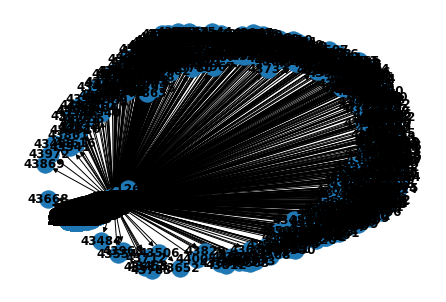

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
from time import time

from gem.utils import graph_util, plot_util
from gem.evaluation import visualize_embedding as viz
from gem.evaluation import evaluate_graph_reconstruction as gr
from gem.embedding.hope import HOPE
from argparse import ArgumentParser

edge_f = 'edges.txt'
isDirected = True

# Load graph
G = graph_util.loadGraphFromEdgeListTxt(edge_f, directed=isDirected)
G = G.to_directed()
nx.draw(G, with_labels=True, font_weight='bold')